In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
# Import data
df = pd.read_csv("data_portfolio.csv")
df.head()
print(df)

           Date        CL=F     ES=F         GC=F   NG=F      NQ=F  \
0    2022-04-01   99.269997  4539.25  1919.099976  5.720  14863.75   
1    2022-04-04  103.279999  4577.75  1929.199951  5.712  15164.25   
2    2022-04-05  101.959999  4520.25  1922.900024  6.032  14828.00   
3    2022-04-06   96.230003  4475.75  1918.400024  6.029  14505.25   
4    2022-04-07   96.029999  4496.25  1933.800049  6.359  14536.00   
..          ...         ...      ...          ...    ...       ...   
496  2024-03-22   80.629997  5293.25  2158.100098  1.659  18574.75   
497  2024-03-25   81.949997  5278.25  2174.800049  1.615  18513.50   
498  2024-03-26   81.620003  5265.25  2175.600098  1.575  18449.00   
499  2024-03-27   81.349998  5308.25  2190.600098  1.718  18503.75   
500  2024-03-28   83.169998  5308.50  2217.399902  1.763  18475.00   

           RTY=F     YM=F        ^GSPC         ^IXIC  
0    2088.300049  34718.0  4545.859863  14261.500000  
1    2094.600098  34829.0  4582.640137  14532.549

In [3]:
# Calculate log return and drop any NAs
index = ["CL=F", "ES=F", "GC=F", "NG=F", "NQ=F", "RTY=F", "YM=F", "^GSPC", "^IXIC"]
logreturn = np.log(df[index]/df[index].shift(1))
logreturn = logreturn.dropna()
print(logreturn)

         CL=F      ES=F      GC=F      NG=F      NQ=F     RTY=F      YM=F  \
1    0.039600  0.008446  0.005249 -0.001400  0.020015  0.003012  0.003192   
2   -0.012863 -0.012640 -0.003271  0.054509 -0.022423 -0.024992 -0.008043   
3   -0.057839 -0.009893 -0.002343 -0.000498 -0.022007 -0.014198 -0.004380   
4   -0.002081  0.004570  0.007995  0.053290  0.002118 -0.004030  0.002642   
5    0.022956 -0.002840  0.004025 -0.012820 -0.014482 -0.007455  0.003560   
..        ...       ...       ...       ...       ...       ...       ...   
496 -0.005442 -0.001746 -0.011197 -0.014363  0.000700 -0.013851 -0.008442   
497  0.016239 -0.002838  0.007708 -0.026880 -0.003303  0.001766 -0.004248   
498 -0.004035 -0.002466  0.000368 -0.025080 -0.003490 -0.002243 -0.000479   
499 -0.003314  0.008134  0.006871  0.086906  0.002963  0.021650  0.011626   
500  0.022126  0.000047  0.012160  0.025856 -0.001555  0.003501  0.000797   

        ^GSPC     ^IXIC  
1    0.008058  0.018827  
2   -0.012631 -0.022855

In [4]:
# Function of expected return
def e_return(weight, logreturn):
    return np.sum(logreturn.mean()*weight)

In [5]:
# Function of standard deviation
def stdev_return(weight, cov_matrix):
    variance = weight.T @cov_matrix @weight
    return np.sqrt(variance)

In [6]:
cov_matrix = logreturn.cov()
print(cov_matrix)

           CL=F      ES=F      GC=F      NG=F      NQ=F     RTY=F      YM=F  \
CL=F   0.000562  0.000044  0.000035  0.000149  0.000033  0.000063  0.000042   
ES=F   0.000044  0.000135  0.000017  0.000076  0.000172  0.000150  0.000107   
GC=F   0.000035  0.000017  0.000074  0.000013  0.000017  0.000020  0.000014   
NG=F   0.000149  0.000076  0.000013  0.002502  0.000068  0.000102  0.000068   
NQ=F   0.000033  0.000172  0.000017  0.000068  0.000241  0.000183  0.000126   
RTY=F  0.000063  0.000150  0.000020  0.000102  0.000183  0.000221  0.000122   
YM=F   0.000042  0.000107  0.000014  0.000068  0.000126  0.000122  0.000095   
^GSPC  0.000043  0.000134  0.000016  0.000077  0.000171  0.000150  0.000106   
^IXIC  0.000032  0.000169  0.000016  0.000072  0.000233  0.000188  0.000124   

          ^GSPC     ^IXIC  
CL=F   0.000043  0.000032  
ES=F   0.000134  0.000169  
GC=F   0.000016  0.000016  
NG=F   0.000077  0.000072  
NQ=F   0.000171  0.000233  
RTY=F  0.000150  0.000188  
YM=F   0.0001

In [7]:
# Weight
port_value = 100000
# weight = np.array([1/9]*9) # Equal
# weight = np.array([0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1]) # varcov
weight = np.array([0.00458493, 0.18084041, 0.27384339, 0.0021879,  0.2060439,  0.03673825, 0.10243592, 0.170245,   0.0230803]) # MC
port_e_return = e_return(weight, logreturn)
port_stdev_return = stdev_return(weight, cov_matrix)
print(weight)

[0.00458493 0.18084041 0.27384339 0.0021879  0.2060439  0.03673825
 0.10243592 0.170245   0.0230803 ]


In [8]:
# Calculate scenario GainLoss
days = 10
def scenario_gain_loss(port_value, port_stdev_return, days):
    zscore = np.random.normal(0, 1)
    return port_value*port_e_return*days + port_value*port_stdev_return *zscore*np.sqrt(days)

In [9]:
# Monte Carlo Simulation
num_sim = 100000
scenario_return = []

for i in range(num_sim):
    scenario_return.append(scenario_gain_loss(port_value, port_stdev_return, days))

In [10]:
# Confidence interval and VaR
alpha = [0.01, 0.05, 0.10]
VaR_01 = -np.percentile(scenario_return, 100 *alpha[0])
VaR_05 = -np.percentile(scenario_return, 100 *alpha[1])
VaR_10 = -np.percentile(scenario_return, 100 *alpha[2])
print(VaR_10)
print(VaR_05)
print(VaR_01)

3588.7761088213006
4723.81843405732
6757.377473917661


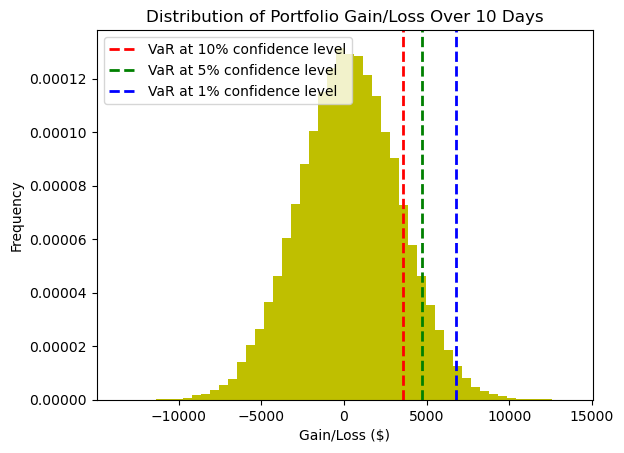

In [11]:
# Plot the results
plt.hist(scenario_return, bins=50, density=True, color='y')
plt.xlabel('Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(VaR_10, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {alpha[2]:.0%} confidence level')
plt.axvline(VaR_05, color='g', linestyle='dashed', linewidth=2, label=f'VaR at {alpha[1]:.0%} confidence level')
plt.axvline(VaR_01, color='b', linestyle='dashed', linewidth=2, label=f'VaR at {alpha[0]:.0%} confidence level')
plt.legend()
plt.show()